# 장애인콜택시 대기시간 예측
## 단계2. 탐색적 데이터 분석

## 0.미션

* 1.개별 변수 분석하기
    * 앞서 생성된 각 변수들 특히 추가로 생성한 변수들에 대해서 단변량 분석을 수행합니다. 
    * 시각화 : Histogram, Boxplot, Barplot
    * 통계량 : 기초 통계량.
    * [옵션] 날짜 요소 관점을 추가해서 EDA 를 수행하시오.
* 2.Features와 Target의 관계 분석하기
    * Target은 숫자입니다.
    * 숫자형 feature들과 Target 과의 관계
        * 한꺼번에 상관관계를 확인하는 방법을 이용하여 분석합시다.
    * 범주형 feature들과 Target
        * sns.barplot, t-검정, 분산분석 등을 이용하여 분석합니다.
    * Target과 관련이 높은 feature와 그렇지 않은 feature를 정리해 봅시다.

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고, 
            * 데이터 파일을 복사해 넣습니다.
    - 라이브러리 설치 및 로딩
        * requirements.txt 파일로 부터 라이브러리 설치
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.


### (1) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [1]:
path = ''

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

### (2) 라이브러리 설치 및 불러오기

#### 1) 설치

* requirements.txt 파일을 아래 위치에 두고 다음 코드를 실행하시오.
    * 로컬 : 다음 코드셀 실행
    * 구글콜랩 : requirements.txt 파일을 왼쪽 [파일]탭에 복사해 넣고 다음 코드셀 실행

!pip install -r requirements.txt

#### 2) 라이브러리 로딩

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import joblib

### (3) 데이터 불러오기
* **세부 요구사항**
    - 전처리 단계에서 저장한 파일을 불러옵니다. data1pkl

In [2]:
file1 = 'data1.pkl'

In [3]:
df = joblib.load('data1.pkl')

## 2.EDA : 1단계 - 개별 정보 분석하기

* **세부요구사항**
    * 의미 있는 변수들을 7개 이상 선정하고 단변량분석을 수행합니다. 
    * [옵션] 각 변수에 대한 탐색시, 요일별, 월별, 연도별로 나눠서도 확인해보세요.
    * 단변량 분석을 위한 코드를 함수로 작성하고 수행하세요.

### (1) 단변량 분석 함수 작성
* **세부요구사항**
    * 코드가 반복되므로, 시각화와 기초통계량을 한꺼번에 처리하는 함수를 생성합시다.
    * 포함되어야 할 내용 : 
        * 기초통계량
            * 숫자 : .describe()
            * 범주 : 범주별 빈도수/비율
        * 시각화


In [13]:
# 숫자형 변수 분석
def eda_num(data, col, bins = 30):
    display(data[[col]].describe().T)
    plt.figure(figsize = (10,6))
    sns.histplot(data[col], bins = bins, kde = True)
    plt.show()

    print('=' * 100)

In [14]:
# 범주형 변수 분석
def eda_cat(data, col) :
    tmp = data[col].value_counts(normalize = True)
    display(tmp)
    sns.countplot(x = col, data = data)
    plt.show()

    print('=' * 100)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2921 entries, 0 to 2920
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              2921 non-null   datetime64[ns]
 1   car_cnt           2921 non-null   int64         
 2   request_cnt       2921 non-null   int64         
 3   ride_cnt          2921 non-null   int64         
 4   waiting_time      2921 non-null   float64       
 5   fare              2921 non-null   int64         
 6   distance          2921 non-null   int64         
 7   weekday           2921 non-null   int64         
 8   month             2921 non-null   int64         
 9   week              2921 non-null   UInt32        
 10  year              2921 non-null   int64         
 11  target            2921 non-null   float64       
 12  temp_max          2921 non-null   float64       
 13  temp_min          2921 non-null   float64       
 14  rain(mm)          2921 n

### (2) 숫자형 변수
* 이제 숫자형 변수들에 대해서 단변량 분석을 수행합니다.

In [17]:
df.columns

Index(['Date', 'car_cnt', 'request_cnt', 'ride_cnt', 'waiting_time', 'fare',
       'distance', 'weekday', 'month', 'week', 'year', 'target', 'temp_max',
       'temp_min', 'rain(mm)', 'humidity_max(%)', 'humidity_min(%)',
       'sunshine(MJ/m2)', 'season', 'holiday', 'ave_waiting_time',
       'ride_rate'],
      dtype='object')

In [10]:
num_col = ['car_cnt', 'request_cnt', 'ride_cnt', 'waiting_time', 'fare', 'distance',
                 'target', 'temp_max', 'temp_min', 'rain(mm)', 'humidity_max(%)', 'humidity_min(%)', 'sunshine(MJ/m2)',
                 'ave_waiting_time', 'ride_rate']

,count,mean,std,min,25%,50%,75%,max
car_cnt,2921.0,418.755221,133.747019,132.0,278.0,454.0,522.0,1413.0


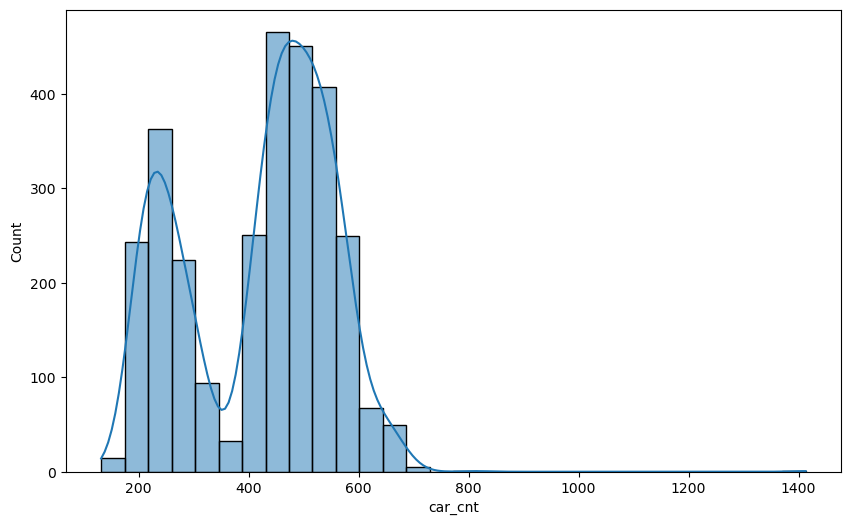

,count,mean,std,min,25%,50%,75%,max
request_cnt,2921.0,3926.20986,1509.649338,527.0,2162.0,4721.0,5110.0,6182.0


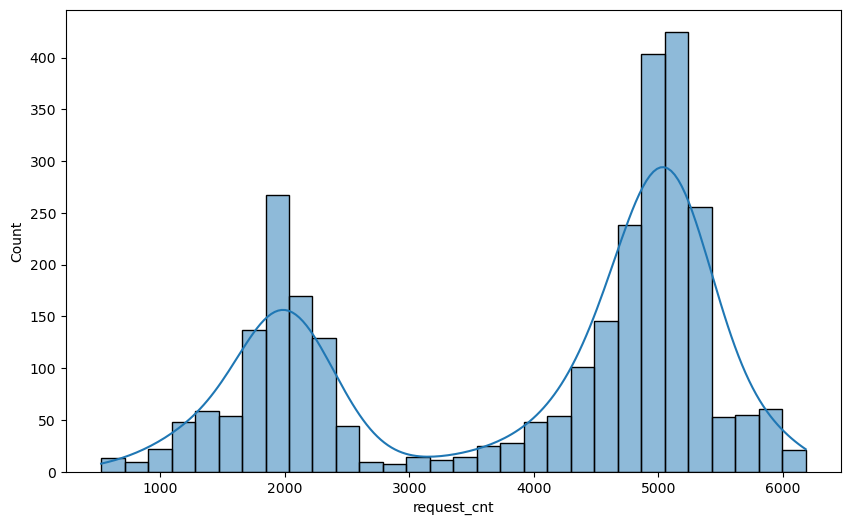

,count,mean,std,min,25%,50%,75%,max
ride_cnt,2921.0,3284.401232,1249.080267,462.0,1779.0,3933.0,4241.0,5189.0


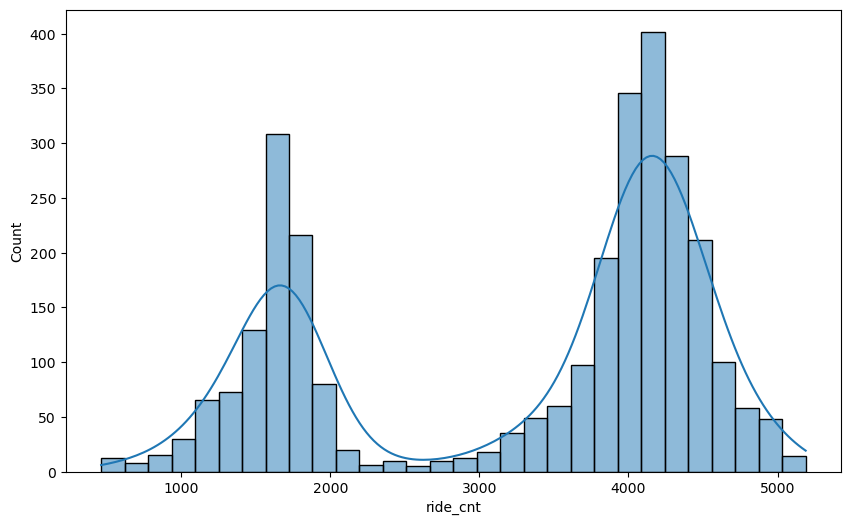

,count,mean,std,min,25%,50%,75%,max
waiting_time,2921.0,40.307942,14.100434,17.2,29.6,38.2,48.6,96.1


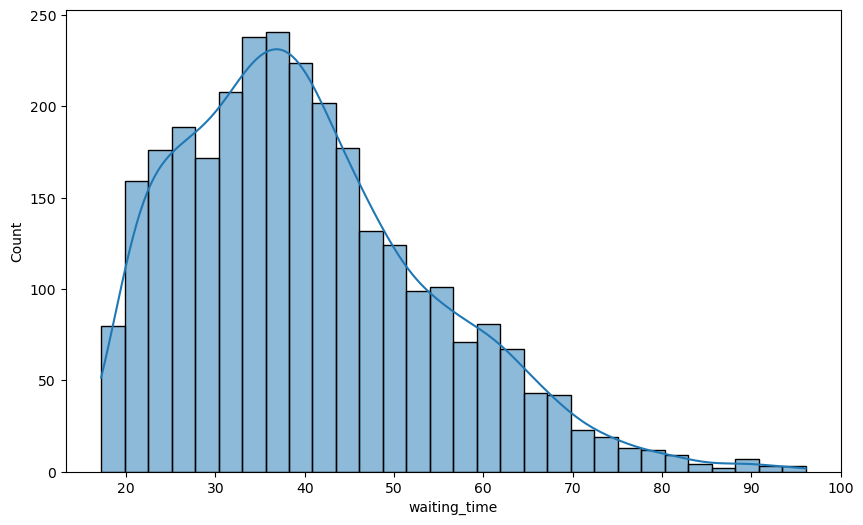

,count,mean,std,min,25%,50%,75%,max
fare,2921.0,2304.267717,107.278144,2131.0,2228.0,2257.0,2401.0,2733.0


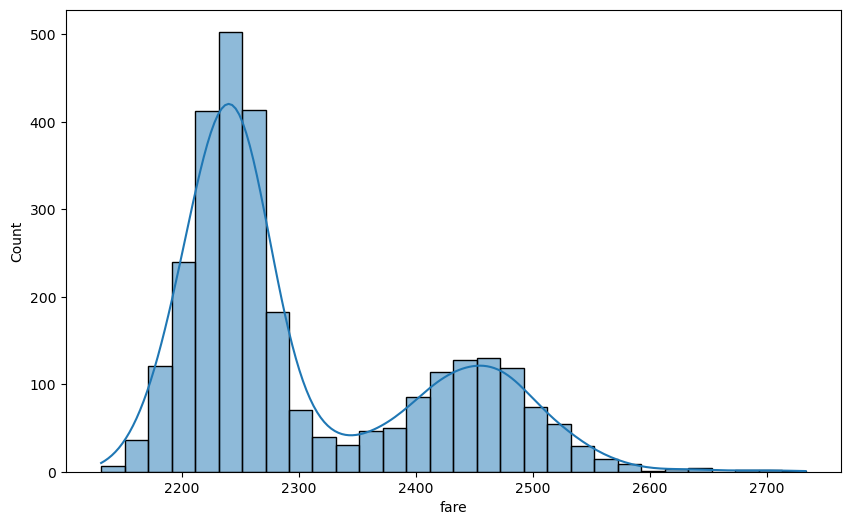

,count,mean,std,min,25%,50%,75%,max
distance,2921.0,9253.437864,1019.367122,7672.0,8521.0,8821.0,10154.0,14136.0


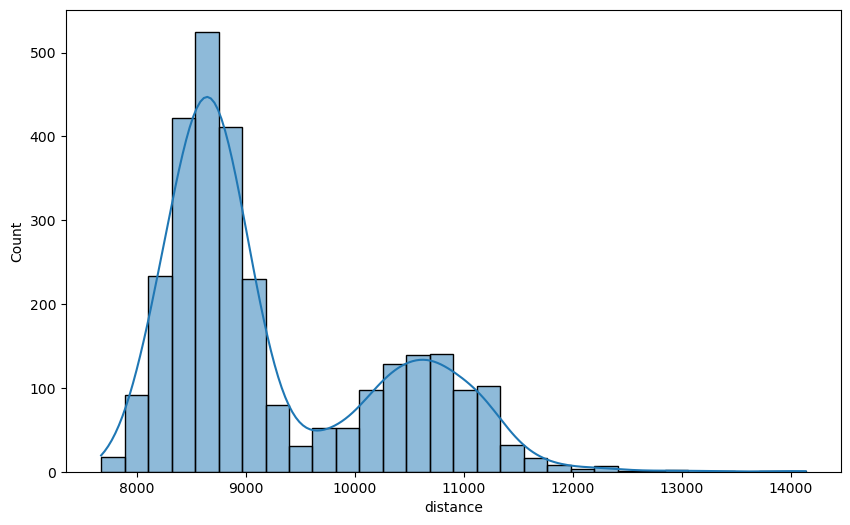

,count,mean,std,min,25%,50%,75%,max
target,2921.0,40.311537,14.097409,17.2,29.6,38.2,48.6,96.1


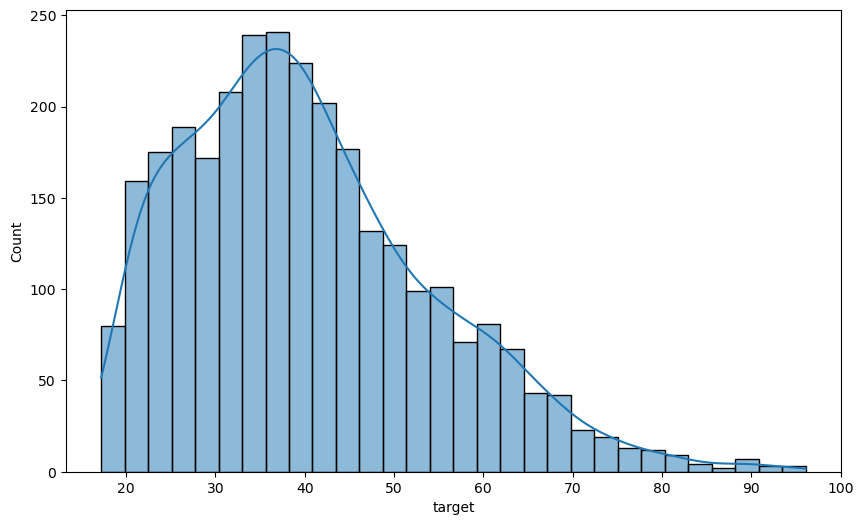

,count,mean,std,min,25%,50%,75%,max
temp_max,2921.0,18.076173,10.708693,-11.2,9.0,19.7,27.4,39.4


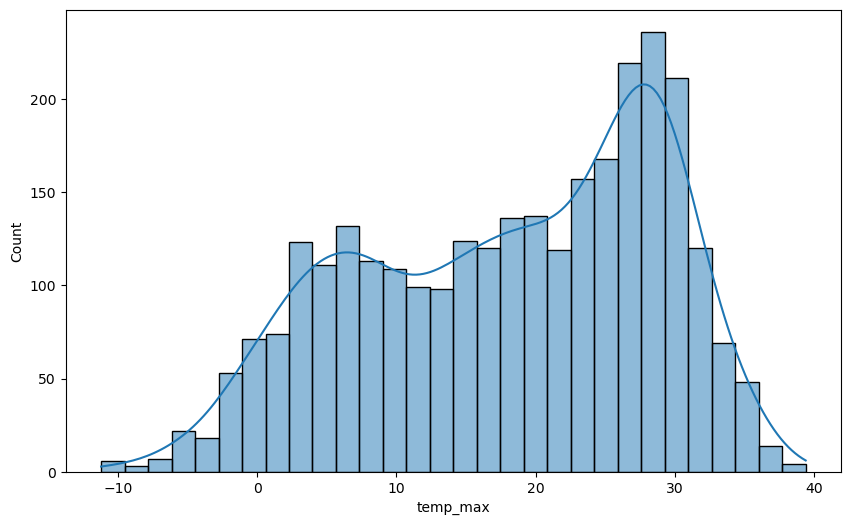

,count,mean,std,min,25%,50%,75%,max
temp_min,2921.0,9.413591,10.78655,-18.5,0.5,10.0,18.9,30.4


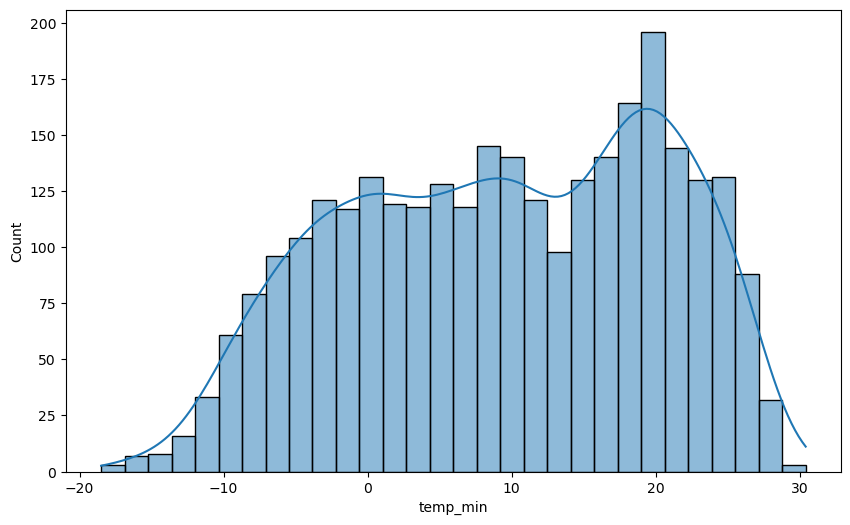

,count,mean,std,min,25%,50%,75%,max
rain(mm),2921.0,3.356761,12.597807,0.0,0.0,0.0,0.3,178.9


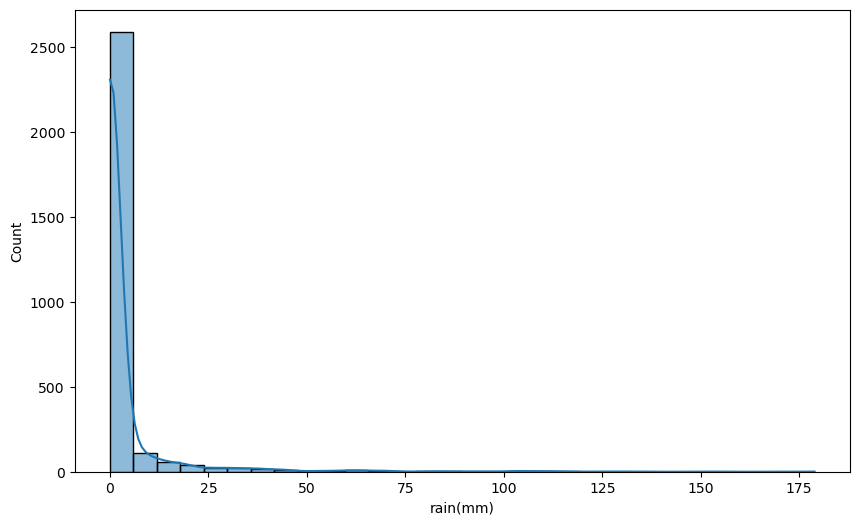

,count,mean,std,min,25%,50%,75%,max
humidity_max(%),2921.0,79.091407,14.033065,29.0,70.0,82.0,90.0,100.0


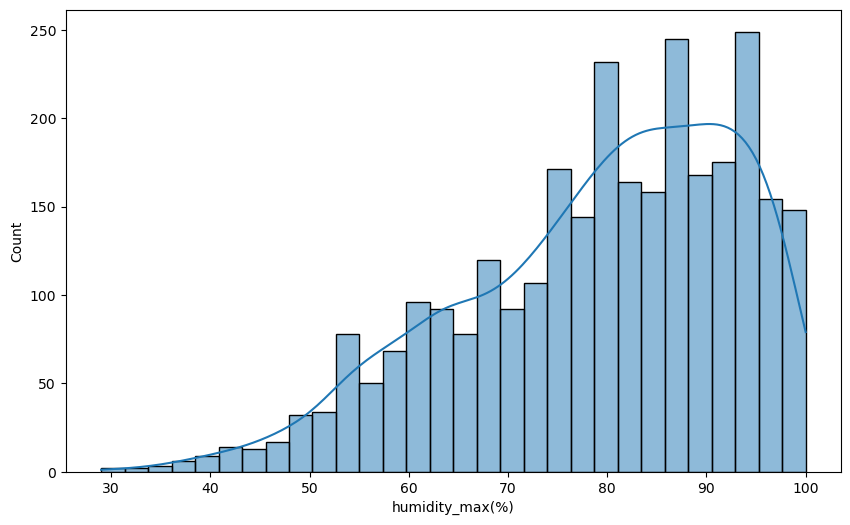

,count,mean,std,min,25%,50%,75%,max
humidity_min(%),2921.0,41.117015,16.401153,7.0,29.0,39.0,51.0,98.0


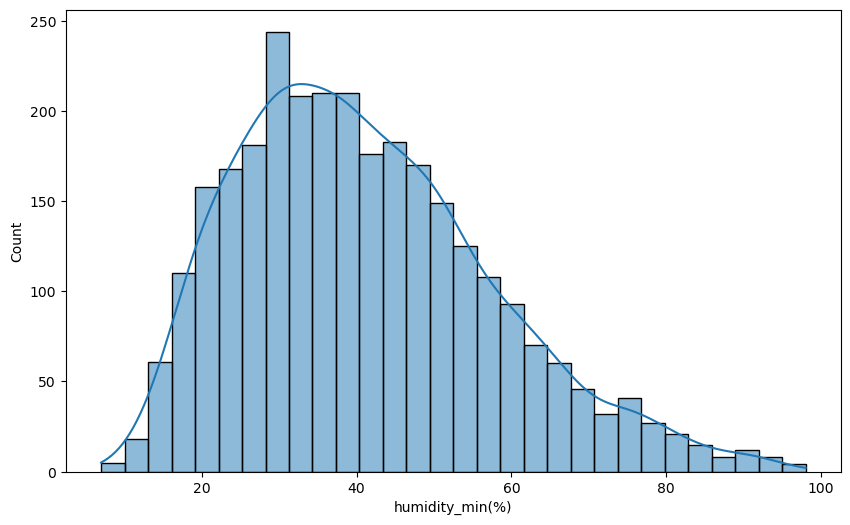

,count,mean,std,min,25%,50%,75%,max
sunshine(MJ/m2),2921.0,13.497333,6.941204,0.0,8.24,12.68,18.58,30.79


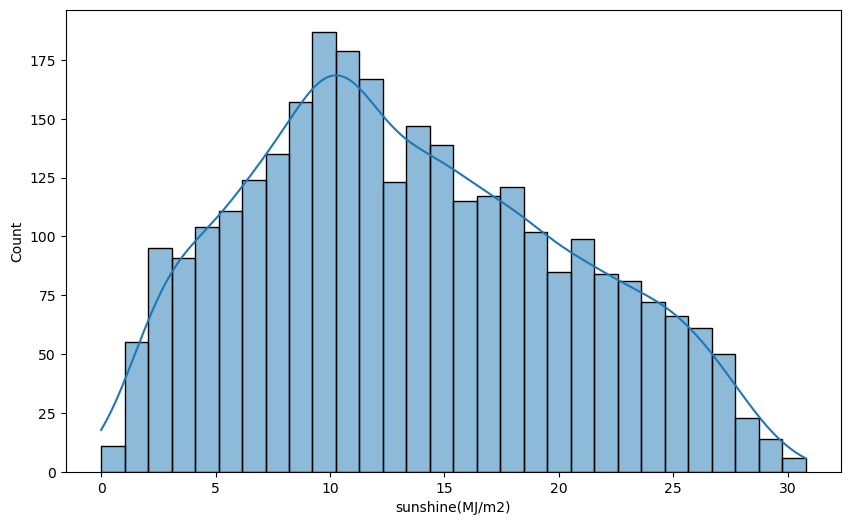

,count,mean,std,min,25%,50%,75%,max
ave_waiting_time,2921.0,40.285669,12.046177,18.8,31.27,39.03,46.97,83.93


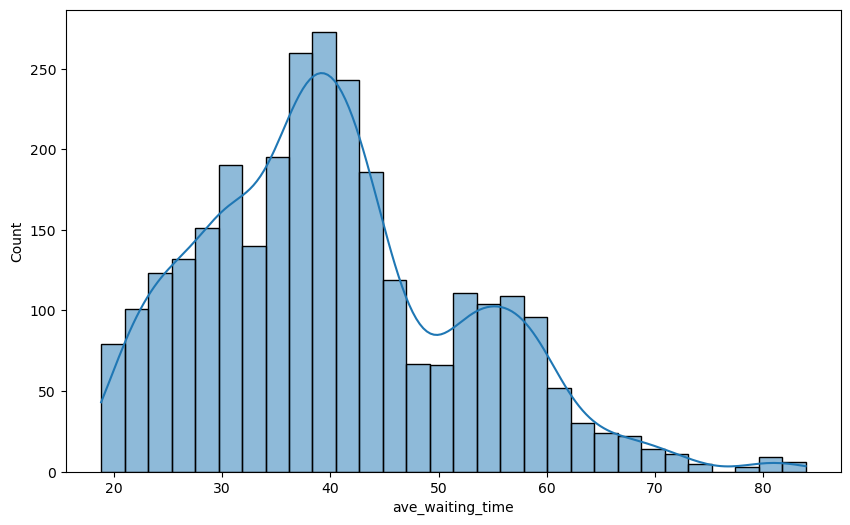

,count,mean,std,min,25%,50%,75%,max
ride_rate,2921.0,84.157955,5.21807,59.699625,80.595581,84.565979,87.772194,96.884422


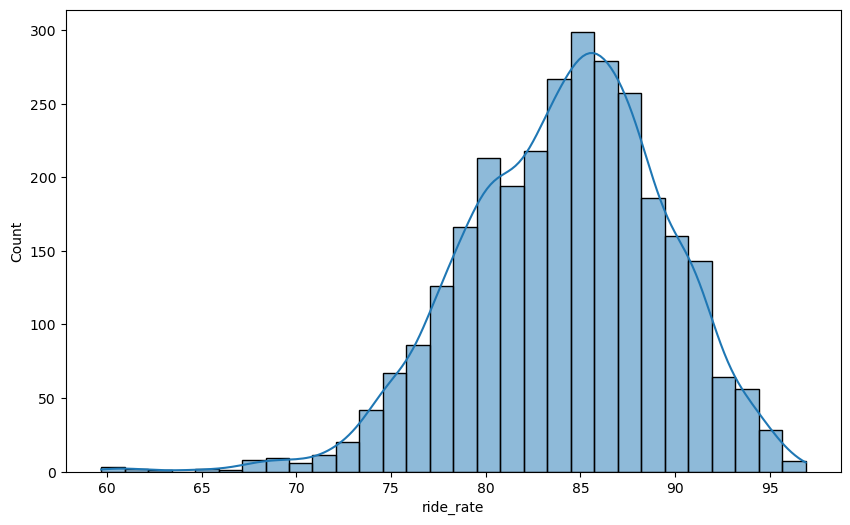

In [15]:
for col in num_col:
    eda_num(df, col)

### (3) 범주형 변수
* 범주형 변수들에 대해서 단변량 분석을 수행합니다.

In [18]:
cate_col = ['weekday', 'month', 'week', 'year', 'holiday']

3    0.143102
4    0.143102
5    0.142759
6    0.142759
0    0.142759
1    0.142759
2    0.142759
Name: weekday, dtype: float64

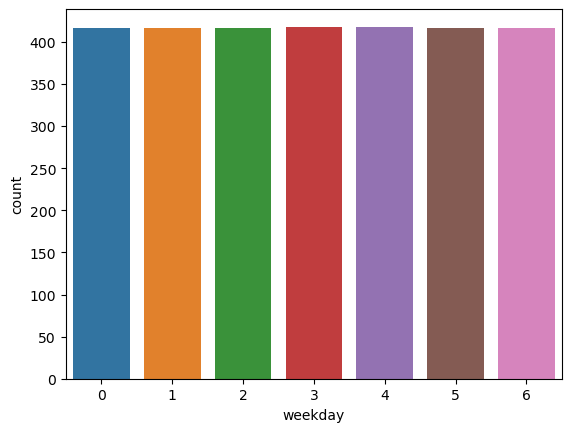

1     0.084902
3     0.084902
5     0.084902
7     0.084902
8     0.084902
10    0.084902
12    0.084560
4     0.082164
6     0.082164
9     0.082164
11    0.082164
2     0.077371
Name: month, dtype: float64

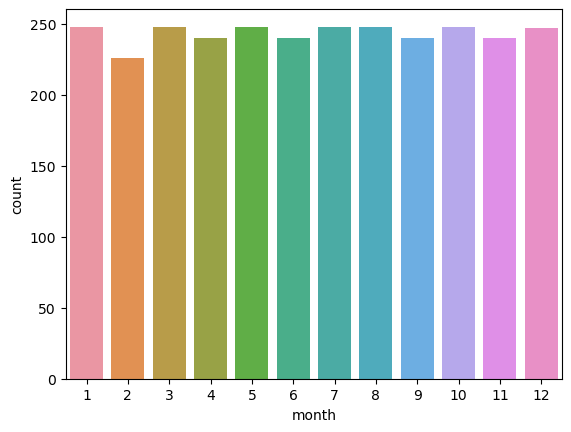

27    0.019172
39    0.019172
29    0.019172
30    0.019172
31    0.019172
32    0.019172
33    0.019172
34    0.019172
35    0.019172
36    0.019172
37    0.019172
38    0.019172
40    0.019172
2     0.019172
41    0.019172
42    0.019172
43    0.019172
44    0.019172
45    0.019172
46    0.019172
47    0.019172
48    0.019172
49    0.019172
50    0.019172
28    0.019172
26    0.019172
14    0.019172
13    0.019172
3     0.019172
4     0.019172
5     0.019172
6     0.019172
7     0.019172
8     0.019172
9     0.019172
10    0.019172
11    0.019172
12    0.019172
51    0.019172
25    0.019172
15    0.019172
16    0.019172
17    0.019172
18    0.019172
19    0.019172
20    0.019172
21    0.019172
22    0.019172
23    0.019172
24    0.019172
52    0.018487
1     0.018144
53    0.004793
Name: week, dtype: Float64

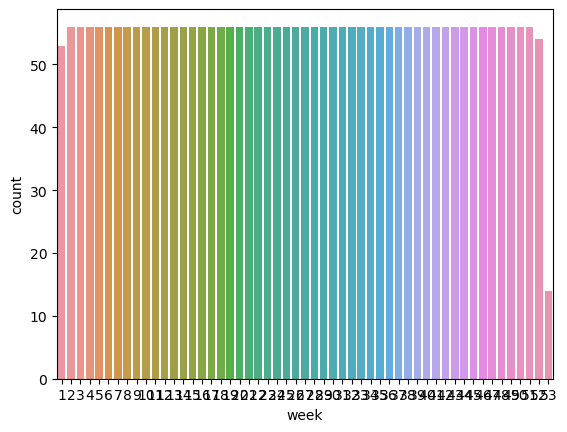

2016    0.125300
2020    0.125300
2015    0.124957
2017    0.124957
2018    0.124957
2019    0.124957
2021    0.124957
2022    0.124615
Name: year, dtype: float64

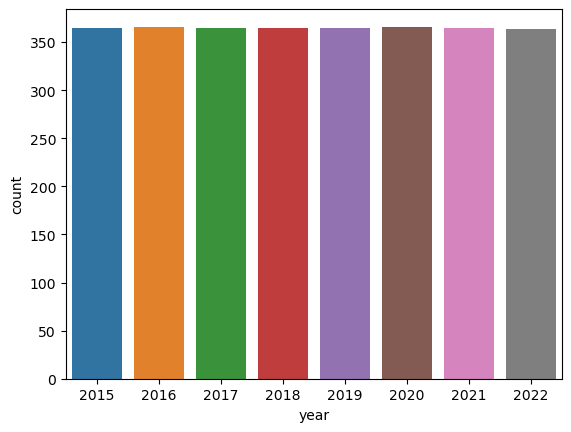

0    0.959261
1    0.040739
Name: holiday, dtype: float64

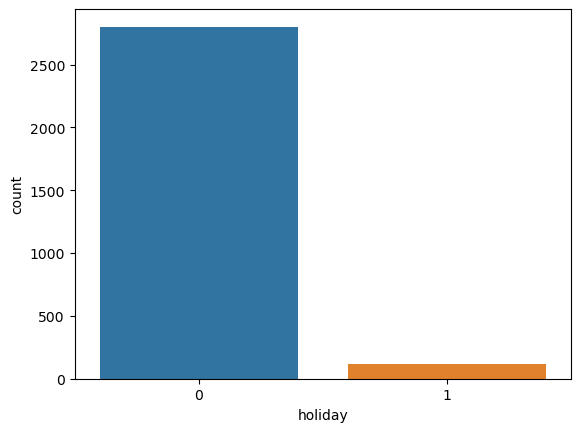

In [19]:
for col in cate_col:
    eda_cat(df, col)

## 3.EDA 2단계 - feature와 target 비교 분석하기

* **세부요구사항**
    * 숫자 feature --> target
        * 전체 상관계수 구하고 시각화(heatmap)해서 파악해봅시다.
        * 상위 n개의 feature와 target의 상점도를 확인해봅시다.
    * 범주 feature --> target
        * 시각화 : 평균 비교 barplot
        * 수치화 : t-test, anova
    * 이번 단계에서는 함수 생성은 선택사항 입니다.

상관계수는 : 0.1 이상

t-value, f-value : 2이상

In [29]:
## 이변량 분석
def eda_num_2(col, target, data=df):  
    sns.regplot(x=col, y = target, data = data)
    plt.show()

    result = spst.pearsonr(data[col], data[target])
    print(f'corr : {result[0]}, p-value : {result[1]}')

    print('=' * 100)

In [30]:
## 이변량 분석
def eda_cat_2(col, target, data=df):
    sns.barplot(x = col, y = target, data=data)
    plt.show()

    tmp = data.loc[~data[col].isna()]
    cate = data[col].unique()
    arg = []

    for i in cate:
        arg.append(tmp.loc[tmp[col] == i, target])

    if len(cate) == 2:
        result =spst.ttest_ind(arg[0], arg[1])
        print(f't-stat : {result[0]}, p-value : {result[1]}')

    else:
        result = spst.f_oneway(*arg)
        print(f'f-stat : {result[0]}, p-value : {result[1]}')

    print('=' * 100)

### (1) 숫자 feature --> Target
* 전체 상관계수 시각화(heatmap)
* 상위 n개 산점도 그리기

#### 1) 전체 상관계수 시각화

C:\Users\SIK\AppData\Local\Temp\ipykernel_24628\1087095873.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


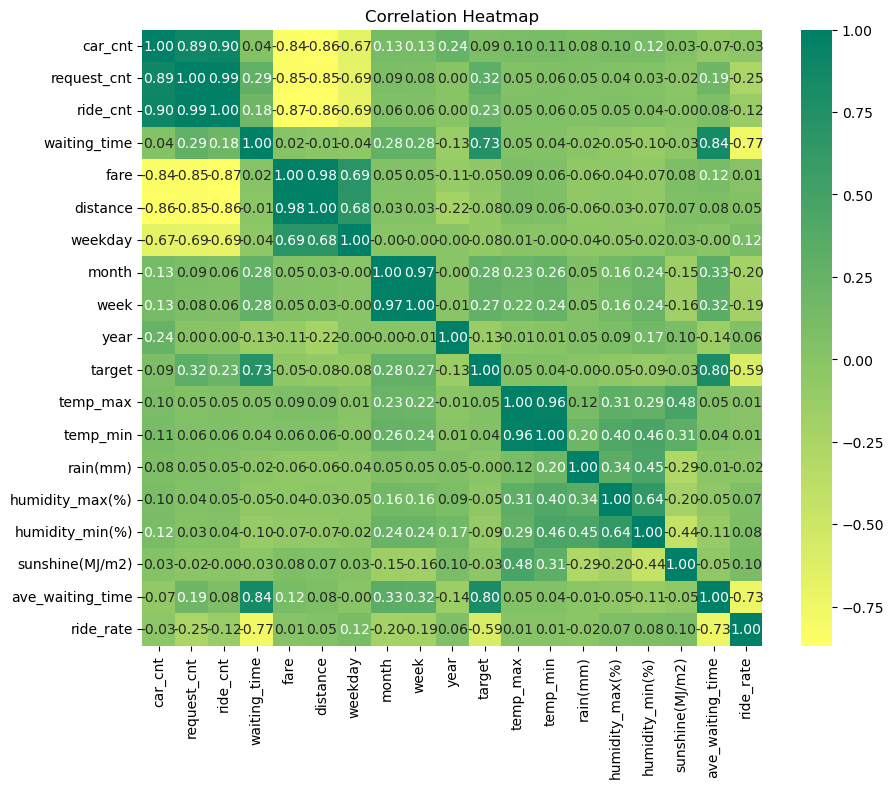

In [24]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='summer_r', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#### 2) 산점도

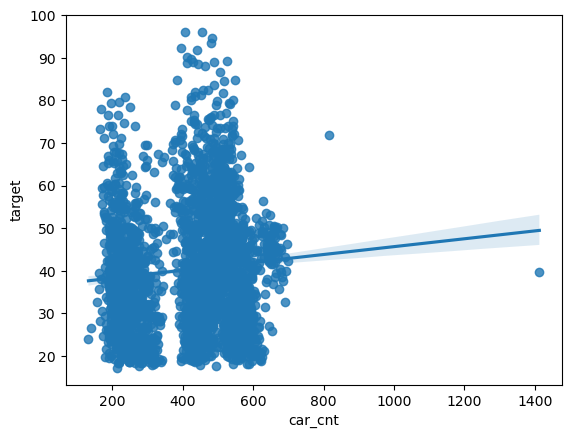

corr : 0.08762726428883835, p-value : 2.1054934684681903e-06


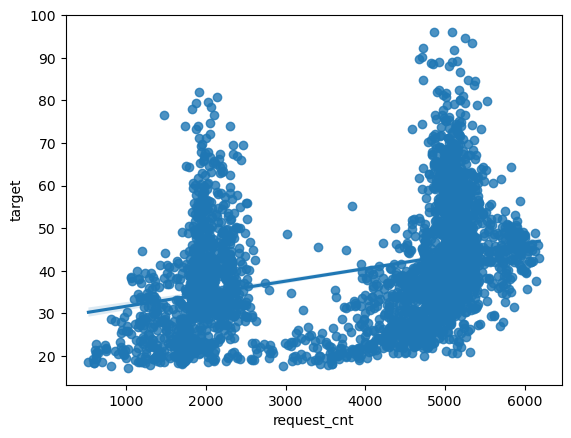

corr : 0.3161805705651032, p-value : 8.053505035864993e-69


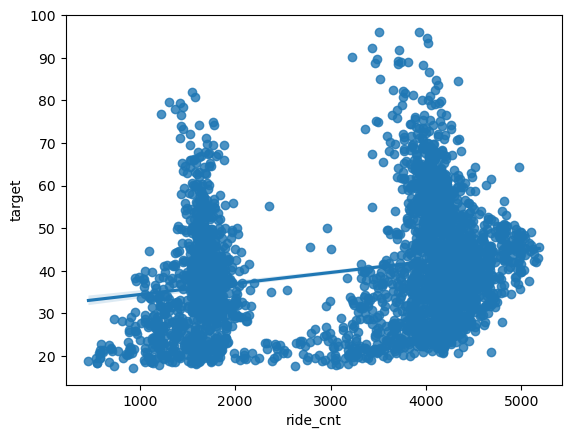

corr : 0.22912683813397744, p-value : 4.212433475895381e-36


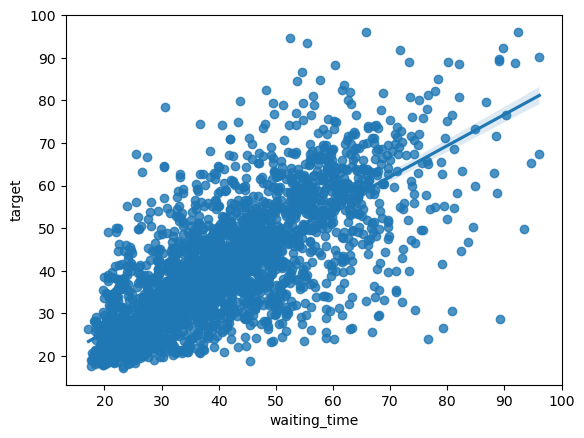

corr : 0.732299284756253, p-value : 0.0


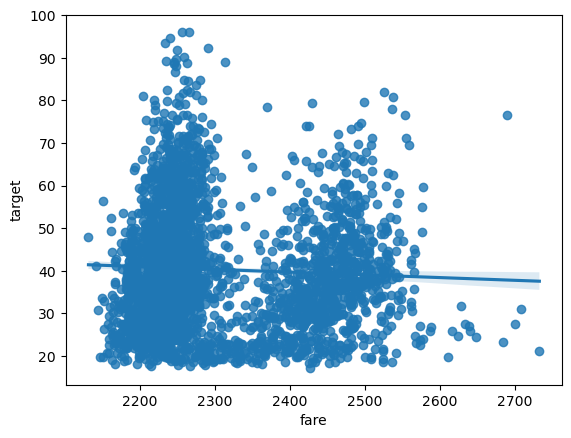

corr : -0.04877216289611941, p-value : 0.008379225010754299


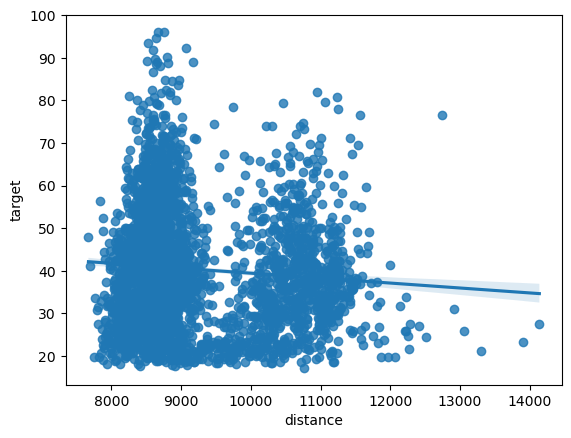

corr : -0.08385491801519174, p-value : 5.676320637949786e-06


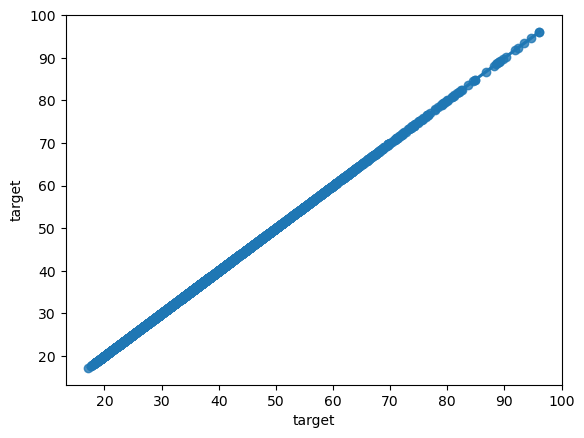

corr : 1.0, p-value : 0.0


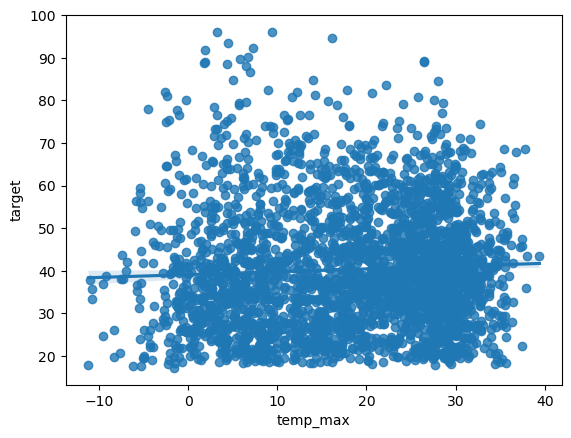

corr : 0.050323307472728104, p-value : 0.006521346966928798


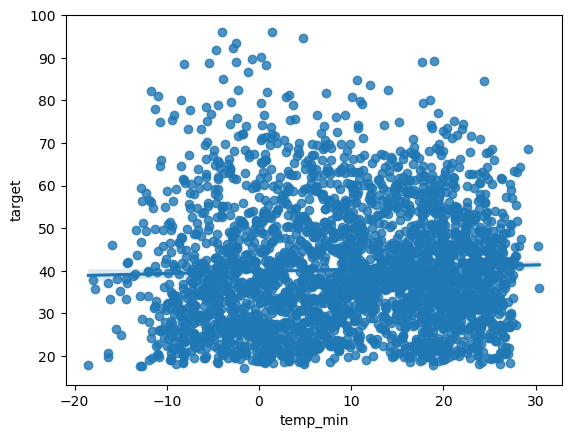

corr : 0.03870421667080783, p-value : 0.03646471851857541


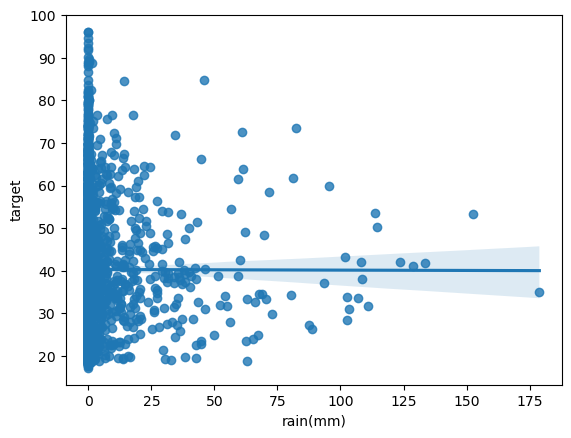

corr : -0.0013457339122448769, p-value : 0.9420442045390395


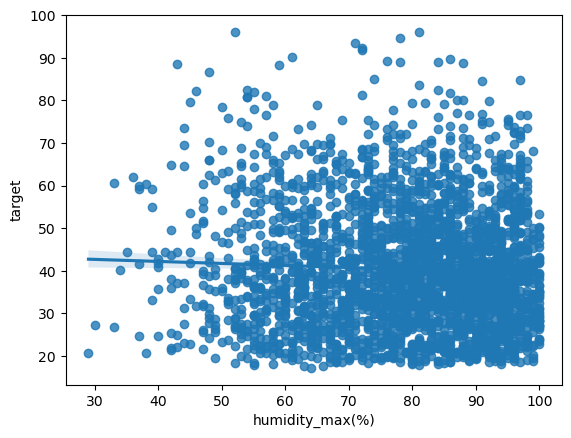

corr : -0.04748074867312078, p-value : 0.010272861288093288


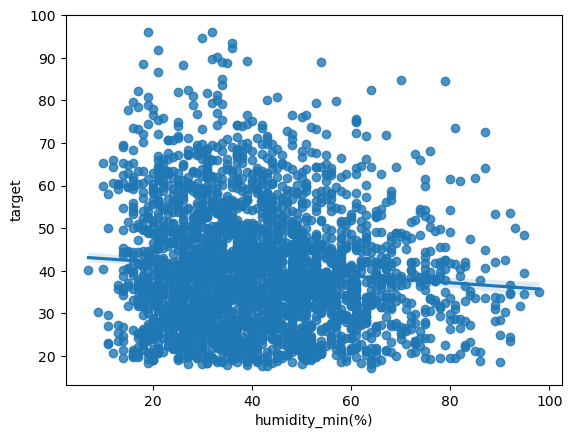

corr : -0.09432350107576476, p-value : 3.272423782314244e-07


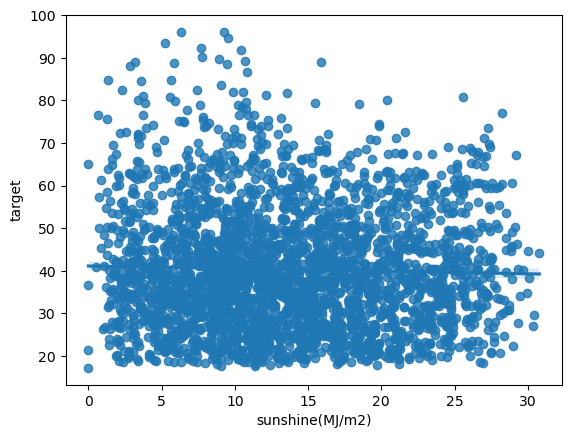

corr : -0.029907986394036794, p-value : 0.10607594984715192


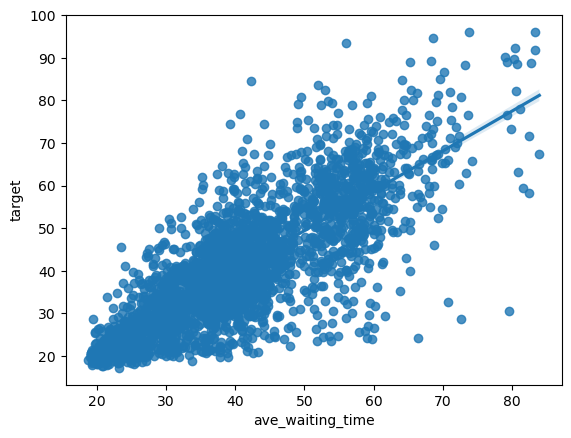

corr : 0.8000432072401646, p-value : 0.0


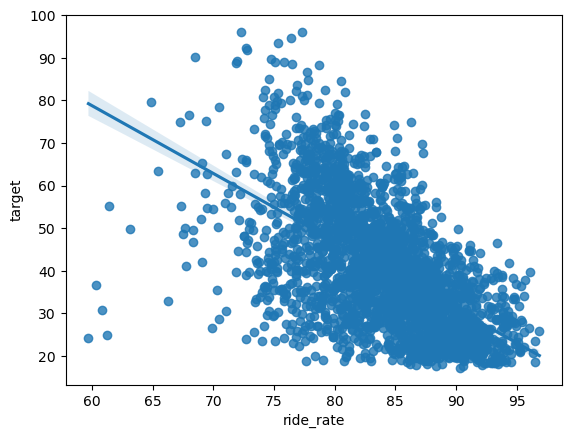

corr : -0.5887971251082604, p-value : 3.7443467557162955e-272


In [32]:
for col in num_col:
    eda_num_2(col, 'target')

### (2) 범주 feature --> Target

* 범주형 변수들과 target 간의 관계를 살펴봅시다.
    * 시각화 : 평균비교 barplot
    * 수치화 : t-검정, anova

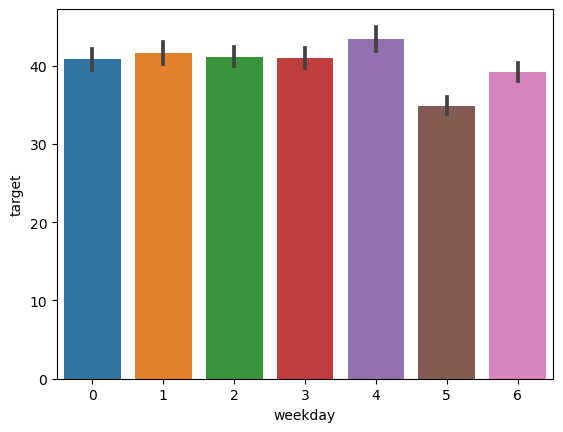

f-stat : 15.709598754374598, p-value : 7.824951103498204e-18


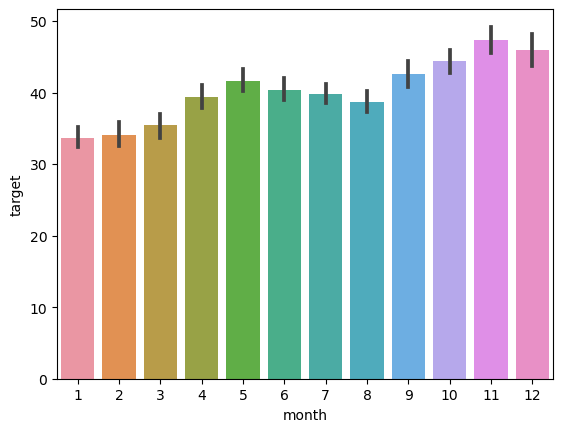

f-stat : 26.038027587151618, p-value : 3.1376628494036258e-52


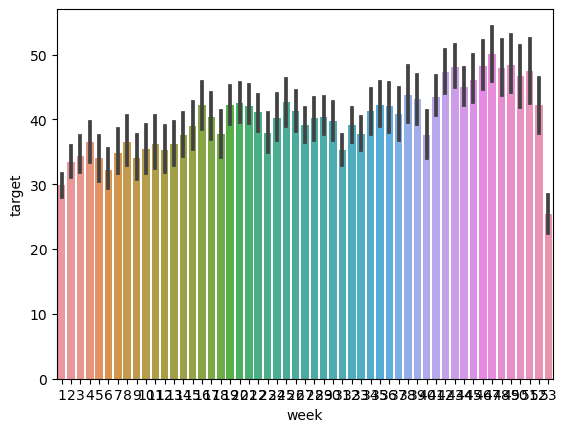

f-stat : 7.186480362811633, p-value : 1.4040533433365622e-46


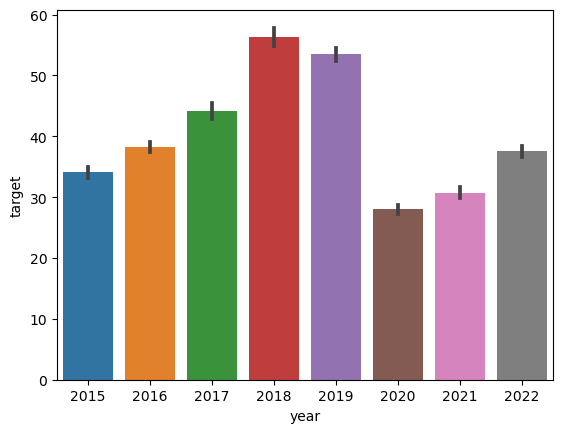

f-stat : 360.9330046161704, p-value : 0.0


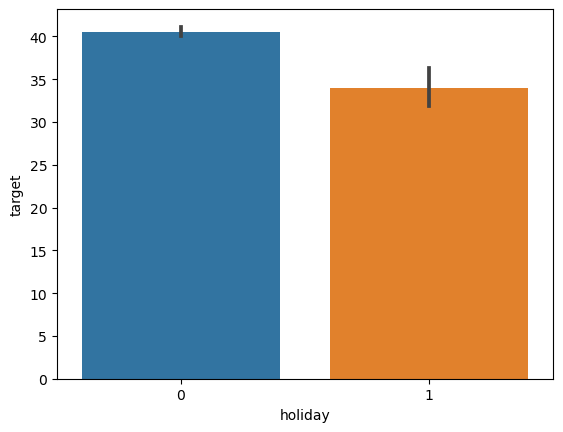

t-stat : -4.99765770730323, p-value : 6.145444639480913e-07


In [34]:
for col in cate_col:
    eda_cat_2(col, 'target', df)

## 4.변수 정리

* Target과 관련성이 높은 feature와 그렇지 않은 feature를 정리합니다.
* 여기서의 판단은 다소 주관적입니다. 조금 정확하지 않아도 괜찮습니다.
* 다음 단계 모델링에서 관련이 적은 변수는 포함시키거나, 제외를 고려할때 활용합니다.

* 강한 관계의 변수

* 중간(약한) 관계의 변수

* (거의) 관계가 없는 변수

## 5.데이터 저장

* **세부 요구사항**
    * 혹시 데이터에 변경이 발생할 수 있으니, 저장해 놓읍시다.
    * joblib.dump를 이용하시오.
    * 저장할 파일 이름 : data2.pkl

In [35]:
joblib.dump(df, 'data2.pkl')

['data2.pkl']